# Project: Investigate a Dataset - No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains above 100k data about medical appointments in Brazil, indicating whether patients showed up for their appointments or not. It also reveals a number of characteristics of the patients such as age, gender, neighborhood, No show, etc. The No show is represented by 'No' if the patient showed up to their appointment and 'Yes' if the patient does not show up. This would be further classified as 'showed' and 'not_showed' later on in the analysis for easy identification. 

### Question(s) for Analysis

The following are some of the questions the analysis wishes to explore;

Question 1- Is there a relationship between the Gender of patients and missing their appointment?
Question 2- Is there a relationship between the Age of patients and missing their appointment? 
Question 3- Does being on a scholarship prevents patients from missing their appointment?
Question 4- Does being hypensive prevents patients from missing their appointment?

In [1]:
# Import of necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the dataset.
# Displaying few rows to confirm successful upload.

df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Geting the dimension of the dataset

df.shape

(110527, 14)

In [4]:
# Getting a broad overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### The above reveals the data types as well as if there is any row with null values which there is none, as displayed. Also, scheduledday and appointment have a wrong data type (as object rather than a date and time) which would be transformed soon.¶

In [ ]:
# Visualizing the broad overview of the dataset

df.hist(figsize=(11,11));

In [9]:
# Getting the descriptive information of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The above is done to check for any outliers or incorrect values and it was discovered that 'age' has a -1 value which is incorrect.

In [10]:
# confirming age with a min of -1 as seen in the description

df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
# checking for any duplicates

df.duplicated().sum()

0

#### The above reveals that there are no duplicates in the data set.

#### > Based on brief check of the data, columns would be renamed for correction and consistency
#### > ScheduleDay and AppointmentDay needs to be transformed to datetime data type, unlike object as displayed
#### > As discovered in the description, age should not have a negative value as min


## Data Cleaning

#### Performing the cleaning operations as stated above

In [12]:
#  Renaming of columns
df.rename(columns={'PatientId' : 'patient_id', 'AppointmentID' : 'appointment_id', 'Age' : 'age', 'Neighbourhood' : 'neighbourhood', 
                   'Gender' : 'gender', 'ScheduledDay' : 'scheduled_day',
                   'AppointmentDay' : 'appointment_day', 'Scholarship' : 'scholarship',
                   'Hipertension' : 'hypertension', 'Diabetes' : 'diabetes', 'Alcoholism' : 'alcoholism',
                   'Handcap' : 'handicap', 'SMS_received' : 'sms_received', 'No-show' : 'no_show'}, inplace=True)

#  Confirm the renaming
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Transform ScheduleDay datatype 
df.scheduled_day = pd.to_datetime(df.scheduled_day)

#  Confirm the transformation
df.scheduled_day.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: scheduled_day, dtype: datetime64[ns]

In [14]:
# Transform AppointmentDay datatype 
df.appointment_day = pd.to_datetime(df.appointment_day)

# Confirm the transformation
df.appointment_day.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: appointment_day, dtype: datetime64[ns]

In [15]:
# Drop the min value of -1 discovered in the age column
df.drop(df.query('age == -1').index,inplace=True)

# Confirmation of he age dropped
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Additional Cleaning

In [16]:
# create a column for those who showed and those who did not showed for easy identification

showed = df.no_show == 'No'
not_showed = df.no_show == 'Yes'
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,not_showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False


#### For easy identification, the above creates a new column for patients who showed and who did not show.

In [17]:
# Displaying a few column of cleaned data 

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,not_showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False


#### The first 5 rows of the cleaned data

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Is there a relationship between the Gender of patients and missing their appointments?

In [18]:
# Find gender total appointments, represented as 'gta'

gta = df.gender.value_counts()
gta

F    71839
M    38687
Name: gender, dtype: int64

#### There are more females than males in the data set

In [19]:
# Appointments missed by gender, represented by 'am_g', in percentage

am_g = df.groupby('gender')['not_showed'].mean()*100.
am_g

gender
F    20.314871
M    19.967948
Name: not_showed, dtype: float64

#### This represents(in percentage) patients who di not show up for appointment by gender

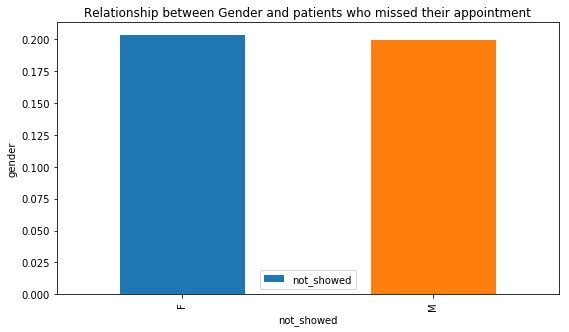

In [20]:
# Visualizing the relationship between Gender and patients who missed their appointment

am_g = df.groupby('gender')['not_showed'].mean().plot(kind='bar', figsize = (9,5))
plt.xlabel('not_showed')
plt.ylabel('gender')
plt.title('Relationship between Gender and patients who missed their appointment')
plt.legend();

#### The above visual reveals that there is no relationship between gender and showing up for appointment.

### Question 2: Is there a relationship between the Age of patients and missing their appointments?

In [21]:
# Show the average appointments NOT missed by age

df.age[showed].mean()

37.790504154999034

In [22]:
# Show average appointments missed by age, represented by 'am_age'

am_age = df.age[not_showed].mean()
am_age

34.317666562121957

In [ ]:
#### # Defining a function for the plot

def bar_plot(xlabel, ylabel, title, legend):
    return bar_plot

# Confirming if the function was correctly written
print('Good!')

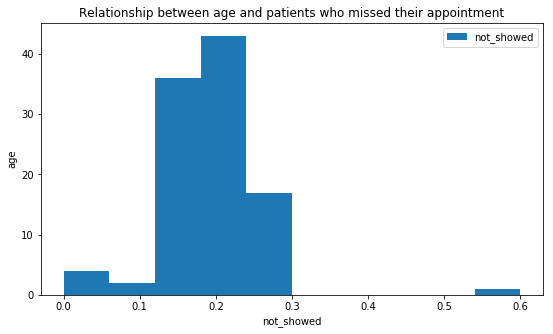

In [23]:
# Visualizing the relationship between Age and Patients who missed their appointment

df.groupby('age')['not_showed'].mean().plot(kind='hist', figsize = (9,5))
bar_plot('not_showed',
         'age',
         'Relationship between age and patients who missed their appointment',
         'not_showed');

#### Majority of patients above 40 years of age do not show up for their appointment.

P:S I tried my best writing the code so it can display the title as well as the legend but I could not get it. I would appreciate if the right code could be provided alongside the review. Thanks!

### Question 3: Does being on a scholarship prevents patients from missing their appointment?

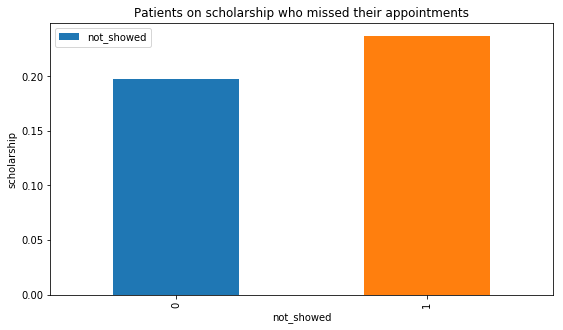

In [24]:
# Visualizing the relationship between patients on a scholarship and also missed their appointment

df.groupby('scholarship')['not_showed'].mean().plot(kind='bar', figsize = (9,5))
bar_plot('not_showed',
         'scholarship',
         'Patients on scholarship who missed their appointments',
         'not_showed');

#### Majority of those who did not show up for their appointment are those with scholarships. Hence being on a scholarship does not indicate willingness to show up for the appointment.

### Question 4- Does being hypertensive prevents patients from missing their appointment?

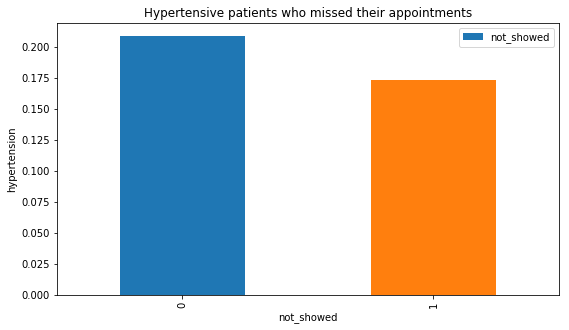

In [25]:
# showing the relationship between hypertensive patients who missed their appointment and patients not hypertensive

df.groupby('hypertension')['not_showed'].mean().plot(kind='bar', figsize = (9,5))
bar_plot('not_showed',
         'hypertension',
         'Hypertensive patients who missed their appointments',
         'not_showed');

#### Patients with hypertension do show up for their appointment, unlike those without the disease.

<a id='conclusions'></a>
## Conclusions

Question 1

It was discovered from the analysis above that the gender of the respective patient does not necessarily determine if they would honor their appointment as about 20% of Female and 19% of Male miss their appointment respectively. Hence, such factor may not be considered as it makes no influence on their appointments.

Question 2

From the analysis made, it was discovered that age really does affect the rate at which the patients attend their appointments. Individuals of an average age of 37 do not miss their appointment while Individuals of an average age of 34 do miss their appointments. Also, it was discovered that individuals of ages above 40 often miss their appointments more.

Question 3

It was discovered from analysis that being on a scholarship does not really prevent patients from missing their appointments as apperently, majority of those who missed their appointments are those enrolled on the Brasilian welfare program.

Question 4

It was also discovered that hypertensive patients have a lower not_showed rate i.e., they do attend their apppointmements compared to those without the health issue.


## Limitations

1 - Complete information (such as the reason for the appointment) was not stated as it could also be a factor for missing such appointment.

2 - Difficulty in determining the accuracy of the data as the mode of collection was not stated. This could affect the level of reliance that can be place on the dataset.


## Reference

Similar project done by Janamales Ova. Can be viewed here - https://janamalesova.github.io/Udacity-Data-Analyst-Nanodegree/P1/

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0